# A Função `meshgrid`

Uma das etapas principais para modelagem de funções é a definição do espaço de parâmetros, ou seja, o conjunto aonde se escreve a função (onde ela "existe"). Veremos a seguir como a função `meshgrid` pode nos ajudar nessa tarefa. Vamos começar apresentado a intuição por trás do problema, uma possível solução e, quando confrontados com limitações do método, traremos a `meshgrid` como solução geral. Exemplos de uso fecham a discussão como ilustração de uso dessa função.

# Intuição

Vamos imaginar que temos duas distribuições de dados: uma distribuição horizontal $x$ com números de 1 a 5 e uma distribuição vertical $y$, também de 1 a 5. Podemos visualizar essas duas distribuições em conjunto formando uma região retangular de largura 5 e altura 5; em outra palavras, podemos enxergar essa grade como um pequeno sistema de coordenadas cartesianas, onde tanto as abscissas quanto as ordenadas variam de 1 a 5.

Se temos um sistema de coordenadas, é natural desejar uma forma de localizar qualquer ponto dentro do sistema, ou seja, um forma de escrever pares de coordenadas. Esses pares nada mais são que todas as combinações possíveis de valores $x$ e $y$. Precisamos escrever duas matrizes $X$ e $Y$ de dimensão $n \times m$, onde $n$ é a quantidade de valores em $x$ e $m$, a de $y$. No nosso exemplo, $N = M = 5$. A distribuição dos valores dessas matrizes se dará ao longo das linhas ou colunas dependendo de qual matriz estamos escrevendo.

$$
X =
\begin{pmatrix}
1 & 2 & 3 & 4 & 5 \\
1 & 2 & 3 & 4 & 5 \\
1 & 2 & 3 & 4 & 5 \\
1 & 2 & 3 & 4 & 5 \\
1 & 2 & 3 & 4 & 5 \\
\end{pmatrix}
\quad \quad
Y =
\begin{pmatrix}
1 & 1 & 1 & 1 & 1 \\
2 & 2 & 2 & 2 & 2 \\
3 & 3 & 3 & 3 & 3 \\
4 & 4 & 4 & 4 & 4 \\
5 & 5 & 5 & 5 & 5 \\
\end{pmatrix}
$$

Para encontrar os pares de valores, basta agora promovermos o "produto cartesiano" entre $X$ e $Y$: encontrar uma nova matriz $C$ onde os elementos $C_{i,j}$ são as combinações entre $X_{i,j}$ e $Y_{i,j}$:

$$
C = X \times Y =
\begin{pmatrix}
(1,1) & (2,1) & (3,1) & (4,1) & (5,1) \\
(1,2) & (2,2) & (3,2) & (4,2) & (5,2) \\
(1,3) & (2,3) & (3,3) & (4,3) & (5,3) \\
(1,4) & (2,4) & (3,4) & (4,4) & (5,4) \\
(1,5) & (2,5) & (3,5) & (4,5) & (5,5) \\
\end{pmatrix}
$$

Vamos escrever as matrizes $X$ e $Y$ e plotar os pontos do $C$ resultante para validar nossa intuição:

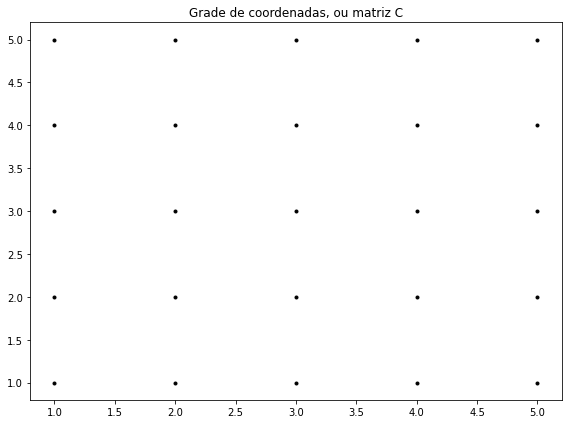

In [109]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    [1, 2, 3, 4, 5],
    [1, 2, 3, 4, 5],
    [1, 2, 3, 4, 5],
    [1, 2, 3, 4, 5],
    [1, 2, 3, 4, 5],
])

Y = np.array([
    [1, 1, 1, 1, 1],
    [2, 2, 2, 2, 2],
    [3, 3, 3, 3, 3],
    [4, 4, 4, 4, 4],
    [5, 5, 5, 5, 5],
])

plt.figure(figsize=(8, 6))
plt.plot(X, Y, marker=".", color="black", linestyle="none")
plt.title("Grade de coordenadas, ou matriz C")
plt.tight_layout()
plt.show()

# Problemas de Generalização

Dois problemas de generalização surgem quando usamos essa abordagem à mão:

1. A tarefa se torna impraticável se quisermos escrever sistemas de coordenadas maiores
2. Apenas os valores inteiros igualmente espaçados não bastam para aplicações reais, e sim o intervalo "contínuo" entre eles

Podemos resolver os dois problemas com a função `meshgrid`: ela toma como parâmetros sequências de valores, um para cada eixo do problema, e retorna as matrizes de distribuição. Em outras palavras, `meshgrid` toma $x$ e $y$ e retorna as $X$ (cópias de $x$ ao longo das linhas) e $Y$ (cópias de $y$ ao longo das colunas) correspondentes.

Dois exemplos a seguir: o primeiro reproduz o nosso exemplo à mão e o segundo mostra a criação de uma malha grande de valores "contínuos".

**Observação:** o termo "contínuo" foi escrito entre parênteses para ressaltar apenas a "ideia" de suficientemente longo; os valores armazenados no computador são todos discretos.

In [95]:
# Reprodução do exemplo à mão
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 3, 4, 5])

X, Y = np.meshgrid(x, y)

print(f"Matriz X {X.shape}:\n{X}\n")
print(f"Matriz Y {Y.shape}:\n{Y}\n")

# Grades com valores contínuos
theta = np.arange(0, 2*np.pi, 0.01)
phi = np.arange(0, np.pi, 0.01)

T, P = np.meshgrid(theta, phi)

print(f"Matriz T {T.shape}:\n{T}\n")
print(f"Matriz P {P.shape}:\n{P}\n")

Matriz X (5, 5):
[[1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]]

Matriz Y (5, 5):
[[1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]
 [5 5 5 5 5]]

Matriz T (315, 629):
[[0.   0.01 0.02 ... 6.26 6.27 6.28]
 [0.   0.01 0.02 ... 6.26 6.27 6.28]
 [0.   0.01 0.02 ... 6.26 6.27 6.28]
 ...
 [0.   0.01 0.02 ... 6.26 6.27 6.28]
 [0.   0.01 0.02 ... 6.26 6.27 6.28]
 [0.   0.01 0.02 ... 6.26 6.27 6.28]]

Matriz P (315, 629):
[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 ...
 [3.12 3.12 3.12 ... 3.12 3.12 3.12]
 [3.13 3.13 3.13 ... 3.13 3.13 3.13]
 [3.14 3.14 3.14 ... 3.14 3.14 3.14]]



# Aplicações

Agora que temos um jeito fácil de criar sistemas de coordenadas, nós **podemos calcular funções contidas nesses sistemas de coordenadas**. Vamos continuar focando no exemplo de grade bidimensional e definir uma função escrita a partir dos valores dos eixos dessa grade. Em outras palavras, vamos escrever um $f(x, y) = z$. Vamos explorar dois exemplos de uso da `meshgrid`, o primeiro mais simples que o segundo.

## Exemplo 1: visualizando a tabuada de multiplicação

Vamos escrever uma função que visualiza os valores das tabuadas de 1 a 10. Vamos agregar as 10 tabuadas em uma grade de dimensão $10 \times 10$, onde o valor armazenado em cada coordenada será a multiplicação entre os respectivos valores de $x$ e $y$. Ou seja, $f(x, y) = z = xy$.

Matriz z = x*y:
[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]



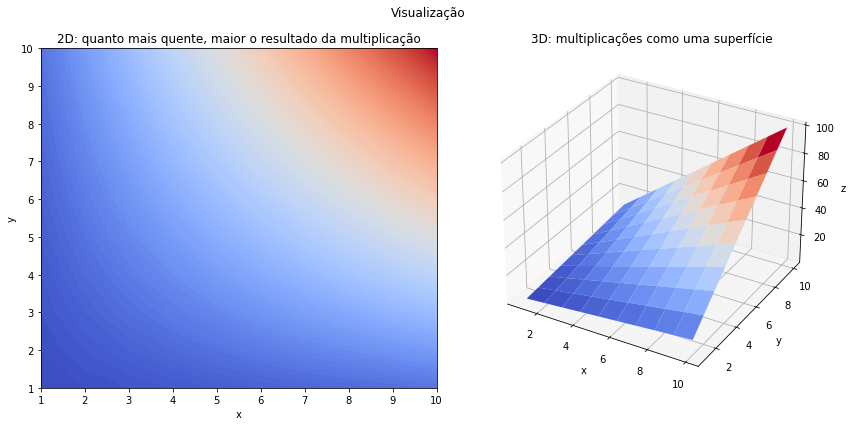

In [108]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# NOTA: É comum escrever as variáveis de retorno do meshgrid
#       como repetições do nome das variáveis de entrada.
#       O uso de matrizes com letra maiúscula, como fizemos
#       até agora, foi apenas para melhor ilustrar a
#       linguagem matemática do problema.
xx, yy = np.meshgrid(x, y)
z = xx * yy

print("Matriz z = x*y:")
print(z)
print()

# Visualização
fig = plt.figure(figsize=(12, 6))
fig.suptitle("Visualização")

# 2D
ax = fig.add_subplot(1, 2, 1)
ax.contourf(xx, yy, z, 100, cmap="coolwarm")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("2D: quanto mais quente, maior o resultado da multiplicação")

# 3D
ax = fig.add_subplot(1, 2, 2, projection="3d")
ax.plot_surface(xx, yy, z, cmap="coolwarm")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("3D: multiplicações como uma superfície")

plt.tight_layout()
plt.show()

## Exemplo 2: uma função mais complexa

Vamos modelar a função $f(x, y) = xe^{-(x^2 + y^2)}$

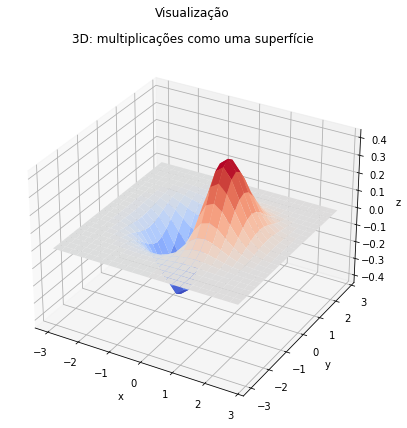

In [111]:
x = np.arange(-2, 2, 0.25)
y = np.arange(-2, 2, 0.25)
xx, yy = np.meshgrid(x, y)

z = xx * np.exp(-1*(xx**2 + yy**2))

# Visualização
fig = plt.figure(figsize=(12, 6))
fig.suptitle("Visualização")

ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.plot_surface(xx, yy, z, cmap="coolwarm")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("3D: multiplicações como uma superfície")

plt.tight_layout()
plt.show()